In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
datatype = {
    "Genes": 49175,
    "Phenotypes": 117679,
    "Absence of phenotype": 315200,
    "Physical interaction": 93532,
    "Diseases (including orthologs)": 29621,
    "Expression values": 1650368,
    "Expression patterns": 74158,
    "Lifestage Ontology": 1372,
    "Disease Ontology": 15193,
    "Phenotype Ontology": 3345,
    "GO Annotation": 137895,
    "GO Ontology": 70372
}

links = {
}

rel2text = {'http://semanticscience.org/resource/SIO_000281': 'not associated with phenotype',
             'http://semanticscience.org/resource/SIO_000628': 'refers to',
               'http://semanticscience.org/resource/SIO_001279': 'associated with phenotype',
                 'http://www.semanticweb.org/needed-terms#001': 'refers to gene',
                   'http://www.semanticweb.org/needed-terms#002': 'refers to life stage',
                     'http://www.semanticweb.org/needed-terms#004': 'refers to expression pattern',
                       'http://www.semanticweb.org/needed-terms#009': 'refers to disease',
                         'http://www.w3.org/1999/02/22-rdf-syntax-ns#label': 'has for label',
                           'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': 'is of type',


                             'http://www.w3.org/2000/01/rdf-schema#subClassOf': 'is a subclass of'}

                            #  'http://purl.obolibrary.org/obo/RO_0002327': 'enables',
                            #    'http://semanticscience.org/resource/SIO_000068': 'is part of',
                            #    'http://purl.obolibrary.org/obo/RO_0002331': 'is involved in',
                            #    'http://semanticscience.org/resource/SIO_001403': 'is associated with',
                            #    'http://purl.obolibrary.org/obo/RO_0001025': 'is located in',
link2 = {}

In [3]:
# load local_celegans.txt
with open("/home/antoine/gene_pheno_pred/local_celegans.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        rel = line.split(' ')[1]
        # add line to dict liinks if not already present
        if rel not in links:
            links[rel] = 1
        else:
            links[rel] += 1

# Replace the keys in links with the corresponding text in rel2text
for key, value in links.items():
    link2[rel2text[key]] = value


FileNotFoundError: [Errno 2] No such file or directory: '/home/antoine/gene_pheno_pred/local_celegans.txt'

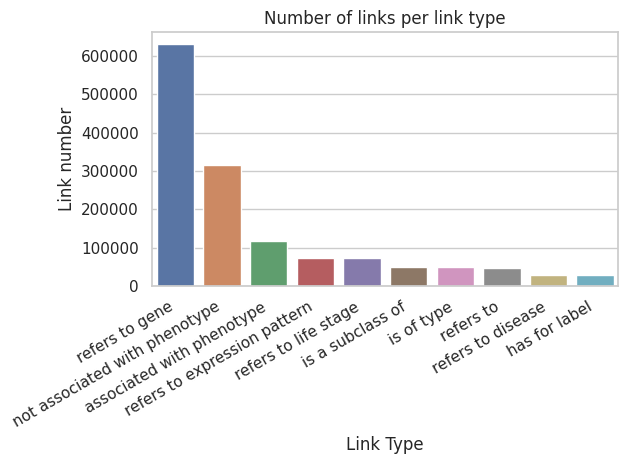

In [5]:
# Plot number of links per link type using seaborn and dict links
df2 = pd.DataFrame.from_dict(link2, orient='index', columns=['count'])
df2 = df2.reset_index()
df2.columns = ['Link Type', 'Link number']
df2 = df2.sort_values(by=['Link number'], ascending=False)
df2 = df2.reset_index(drop=True)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Link Type", y="Link number", data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
# Title
plt.title('Number of links per link type')
plt.tight_layout()
plt.show()



In [6]:
# transform datatype into a dataframe
df = pd.DataFrame.from_dict(datatype, orient='index', columns=['count'])
df = df.reset_index()
df.columns = ['Data Type', 'Annotation number']

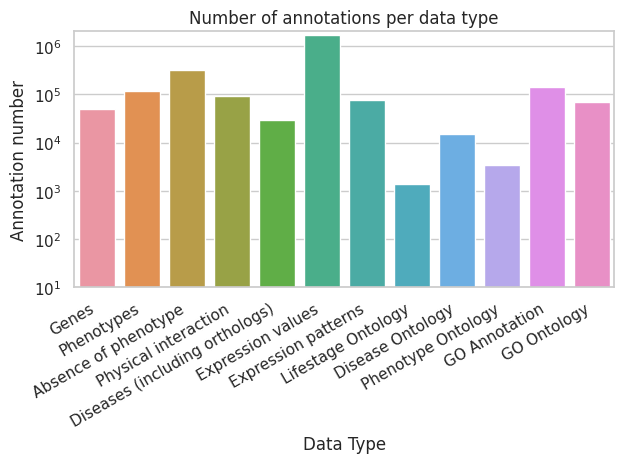

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Data Type", y="Annotation number", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_yscale('log')

red_names = ["Expression values", "GO Annotation", "GO Ontology"]
# for tick in ax.get_xticklabels():
#     if tick.get_text() in red_names:
#         tick.set_color('red')

# Add title
plt.title("Number of annotations per data type")
# Start the plot at 0
plt.ylim(10, 2000000)
plt.tight_layout()

plt.show()


In [85]:
# Load /home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_test.csv as df
data = {}
for set in ["test", "val", "train"]:
    df = pd.read_csv(f"/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_{set}.csv", sep=',', header=None)
    # Drop all but 100th column
    df = df.drop(df.columns[99:], axis=1)
    # Drop all rows containing 'no_link_known'
    df = df.drop(df.columns.difference(['ground_truth']), axis=1, inplace=True)
    data[set]= df



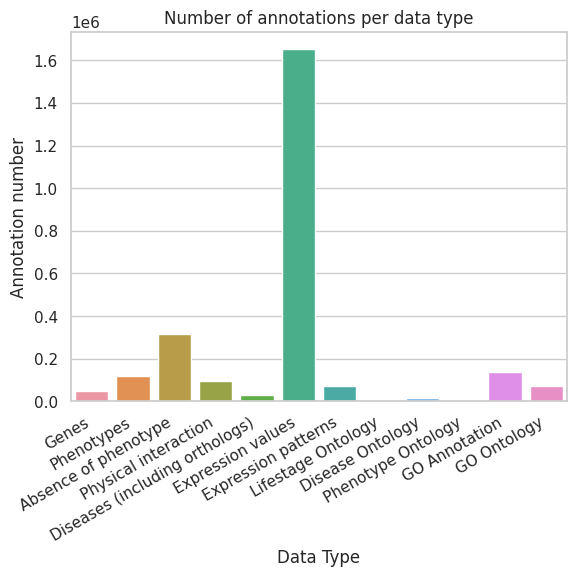

In [49]:
# Plot a barchart without the expression_value
df2 = df[df['Data Type'] != 'expression_value']
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Data Type", y="Annotation number", data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Add title
plt.title("Number of annotations per data type")
plt.show()

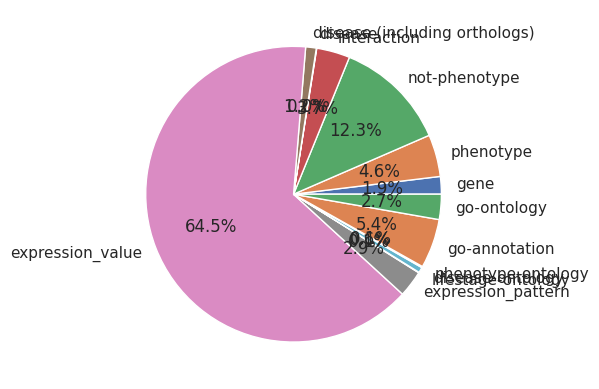

In [32]:
# Plot as a piechart
plt.pie(df['Annotation number'], labels=df['Data Type'], autopct='%1.1f%%')
plt.show()


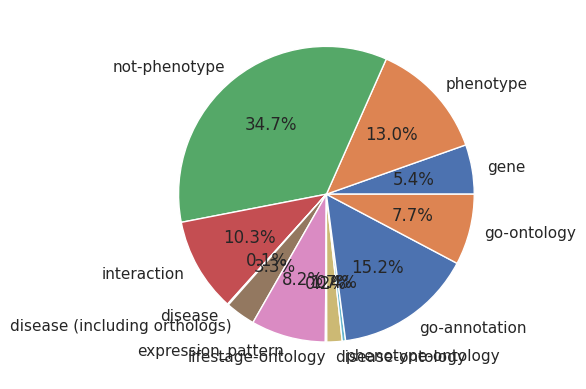

In [36]:
# Plot as a piechart
plt.pie(df2['Annotation number'], labels=df2['Data Type'], autopct='%1.1f%%')
plt.show()
